In [1]:
import sys
sys.path.insert(1, '/content/drive/MyDrive/COVID-19-pooling') 

In [2]:
! pip install mip

In [3]:
from optimal_sizes import minT, optimal_pool_size, optimal_column_weight
from util import simulate_x
import matplotlib.pyplot as plt
import numpy as np 
from membership_matrix import generate_doubly_regular_col
from test import test_M

# Get Started
This notebook shows how to generate a pool design. 

First, input the number of samples (n), population infection rate (f), false positive rate (fpr), and false negative rate (fnr). 

In [4]:
# feel free to modify this cell 

n = 384 
f = 9/384
fpr = 0
fnr = 0 

Let's simulate infection vectors. 

In [5]:
simulate_x(n, f)

On average, 8.82 positives in each trail.


## Option 1: Fix number of pools, varying column weights. 
The first option is fixing the number of pools, and then find an optimal column weight for the membership matrix. 

The theoretical minimum number of pools can be computed using Shannon's source encoding theorem: 


In [6]:
print("For infection rate %.2f%%, please use at least %s pools." % (f * 100, minT(f, n))) 

For infection rate 2.34%, please use at least 62 pools.


First, input the number of pools you would like to use. 

In [7]:
# feel free to modify this cell 

T = 65

The theoretical optimal column weight is computed based on f, fpr, fnr, T, and n. 

In [8]:
print("In theory, the optimal column weight is %s." % (optimal_column_weight(f, fnr, fpr, T, n)))

In theory, the optimal column weight is 5.


Now, input the range of column weights you would like to test: 

In [9]:
# feel free to modify this cell 

column_weights = range(1, 11)

We will now test the optimal column weight. 

**Warning**: Please allow several hours for the following cell to run. 

In [10]:
results = []
for column_weight in column_weights: 
  print("Column Weight: %s" % column_weight)
  M = generate_doubly_regular_col((T, n), column_weight)
  results.append(test_M(M, f, fpr, fnr))

Column Weight: 1
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 2
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 3
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 4
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 5
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 6
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 7
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 8
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Weight: 9
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Column Wei

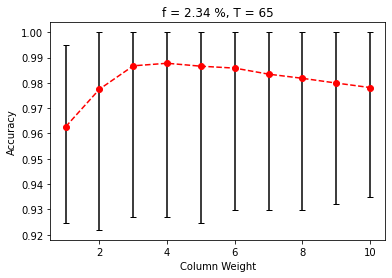

Optimal Column Weight is 4, with average accuracy 98.77%
membership matrix is saved as 'membership-matrix.csv'.


In [11]:
average_accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    average_accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(column_weights, average_accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.title('f = %.2f %%, T = %s' % (f * 100, T))
plt.xlabel('Column Weight')
plt.ylabel('Accuracy')
plt.show()

optimal_index = average_accuracy.index(np.max(average_accuracy))
optimal_weight = column_weights[optimal_index]
optimal_avg_accuracy = average_accuracy[optimal_index]

print("Optimal Column Weight is %s, with average accuracy %.2f%%" % (optimal_weight, optimal_avg_accuracy * 100)) 

M = generate_doubly_regular_col((T, n), optimal_weight)
np.savetxt('membership-matrix.csv', M, delimiter=',')
print("=" * 100)
print("membership matrix is saved as 'membership-matrix.csv'." )

## Option 2: Fix column weights, varying number of pools. 
The second option is fixing the column weight and vary the number of pools. 

First, specify the column weight, i.e. the number of times you would like to divide the samples into. 

In [12]:
# feel free to modify this cell 

column_weight = 6

The theoretical minimum number of pools can be computed using Shannon's source encoding theorem: 

In [13]:
lowerbound = minT(f, n)
print("For infection rate %.2f%%, please use at least %s pools." % (f * 100, lowerbound))

For infection rate 2.34%, please use at least 62 pools.


Now, input the numbers of pools you would like to test: 

In [14]:
# feel free to modify this cell

Ts = list(range(lowerbound, 120, 4))

In [15]:
results = []
for T in Ts: 
  print("T: %s" % T)
  M = generate_doubly_regular_col((T, n), column_weight)
  results.append(test_M(M, f, fpr, fnr))

T: 62
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 66
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 70
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 74
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 78
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 82
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 86
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 90
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 94
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 98
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
T: 102
Sta

Text(0, 0.5, 'Accuracy')

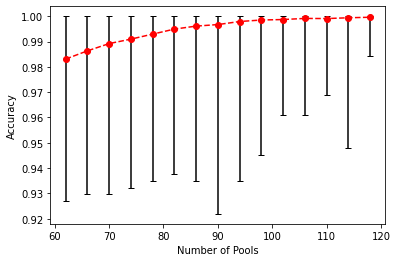

In [16]:
accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(Ts, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Number of Pools')
plt.ylabel('Accuracy')

Specify the number of pools you would like to use, and run the following cells to generate a membership matrix. 

In [17]:
# feel free to modify this cell 

T = 

SyntaxError: ignored

In [ ]:
M = generate_doubly_regular_col((T, n), column_weight)
np.savetxt('membership-matrix.csv', M, delimiter=',')
print("membership matrix is saved as 'membership-matrix.csv'." )